## Wstęp

Celem projektu jest zbadanie jak zmieniało się nastawienie globalnej społeczności do Chin oraz USA na przestrzeni ostatnich 10 lat (tzn. od 2013 do 2023 roku). Do analizy sentymentu zostały wykorzystane tweety pozyskane za pomocą narzędzia snscrape. Każde państwo zostało przeanalizowane na podstawie ok. 96 000 tweetów pozyskanych za pomocą hashtagów #usa oraz #china.

In [ ]:
import re
import pandas as pd
import snscrape.modules.twitter as sntwitter
import nltk
nltk.download("all")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

### Scraping #China

In [ ]:
# Setting variables to be used below
maxTweets = 800  
year_start = 2013
year_end = 2023

# Creating list to append tweet data
china_tweets_list = []

# Loop over each year
for year in range(year_start, year_end):
    # Loop over each month
    for month in range(1, 13):
        if month == 12:
            query = f'#China since:{year}-{month}-02 until:{year+1}-01-01 lang:en'
        else:
            query = f'#China since:{year}-{month}-02 until:{year}-{month+1}-01 lang:en'

        # Using TwitterSearchScraper to scrape data and append tweets to list
        for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
            if i >= maxTweets:  # We use 'greater than or equal to' as indices start at 0
                break
            china_tweets_list.append([tweet.date, re.sub(r"http\S+", "", tweet.rawContent)])

# Creating a dataframe from the tweets list above
china_tweets_df = pd.DataFrame(china_tweets_list, columns=['Datetime', 'Content'])

china_tweets_df.to_csv('china_tweets.csv', index=False)

### Scraping #Usa

In [34]:
# Setting variables to be used below
maxTweets = 800  
year_start = 2013
year_end = 2023

# Creating list to append tweet data
usa_tweets_list = []

# Loop over each year
for year in range(year_start, year_end):
    # Loop over each month
    for month in range(1, 13):
        if month == 12:
            query = f'(#theus OR #america) since:{year}-{month}-02 until:{year+1}-01-01 lang:en'
        else:
            query = f'(#theus OR #america) since:{year}-{month}-02 until:{year}-{month+1}-01 lang:en'

        # Using TwitterSearchScraper to scrape data and append tweets to list
        for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
            if i >= maxTweets:  # We use 'greater than or equal to' as indices start at 0
                break
            usa_tweets_list.append([tweet.date, re.sub(r"http\S+", "", tweet.rawContent)])

# Creating a dataframe from the tweets list above
usa_tweets_df = pd.DataFrame(usa_tweets_list, columns=['Datetime', 'Content'])

usa_tweets_df.to_csv('usa_tweets.csv', index=False)

## Analiza Sentymentu

#### NLTK Vader

In [2]:
# create preprocess_text function
def preprocess_text(text):
    str_processed = re.sub(r'\s+', ' ', text.lower().strip())

    # Tokenize the text
    tokens = word_tokenize(str_processed)

    # Remove stop words
    stop_words = stopwords.words('english')
    stop_words.extend(['https', 'http', 'co', 'amp', 'rt', '#', '@'])
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [ ]:
china_tweets_df = pd.read_csv('china_tweets.csv')
china_tweets_df['Content'] = china_tweets_df['Content'].astype(str)
china_tweets_df['Content'] = china_tweets_df['Content'].apply(preprocess_text)

In [29]:
usa_tweets_df = pd.read_csv('usa_tweets.csv')
usa_tweets_df['Content'] = usa_tweets_df['Content'].astype(str)
usa_tweets_df['Content'] = usa_tweets_df['Content'].apply(preprocess_text)

In [6]:
def get_sentiment(text):

    def polarity_score(compound):
        if compound >= 0.05:
            return "positive"
        elif compound <= -0.05:
            return "negative"
        elif compound > -0.05 and compound < 0.05:
            return "neutral"
    
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']
    return polarity_score(compound)

In [7]:
china_tweets_df['Sentiment'] = china_tweets_df['Content'].apply(get_sentiment)

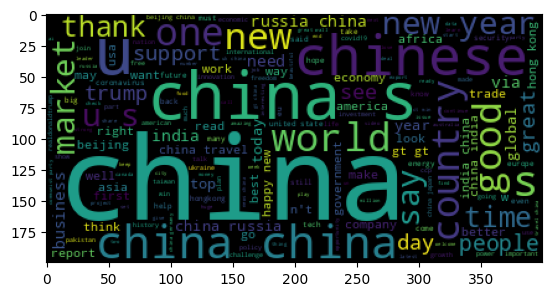

In [8]:
positive_tweets = china_tweets_df[china_tweets_df['Sentiment'] == 'positive']
wordcloud = WordCloud().generate(' '.join(positive_tweets['Content']))
plt.imshow(wordcloud);

#### Chiny i charakterystyczne słowa dla pozytywnych tweetów: 
- new year
- travel
- market
- business
- trade
- world

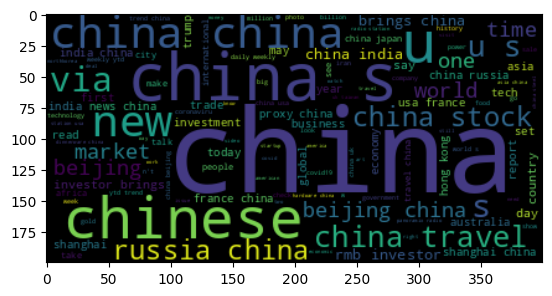

In [9]:
neutral_tweets = china_tweets_df[china_tweets_df['Sentiment'] == 'neutral']
wordcloud = WordCloud().generate(' '.join(neutral_tweets['Content']))
plt.imshow(wordcloud, interpolation='bilinear');

#### Chiny i charakterystyczne słowa dla neutralnych tweetów:
- market
- china travel
- beijing
- investor
- russia

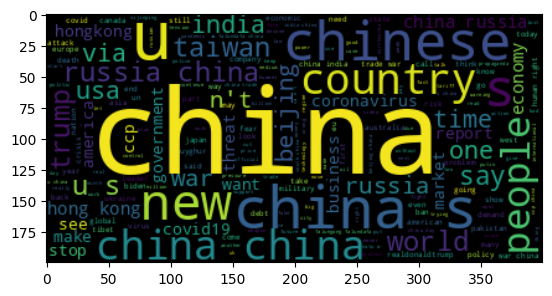

In [10]:
negative_tweets = china_tweets_df[china_tweets_df['Sentiment'] == 'negative']
wordcloud = WordCloud().generate(' '.join(negative_tweets['Content']))
plt.imshow(wordcloud, interpolation='bilinear');

#### Chiny i charakterystyczne słowa dla negatywnych tweetów:
- taiwan
- usa
- coronavirus
- hongkong
- war
- covid
- ccp

In [30]:
usa_tweets_df['Sentiment'] = usa_tweets_df['Content'].apply(get_sentiment)

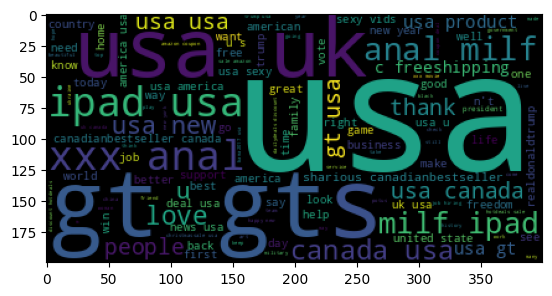

In [31]:
positive_tweets = usa_tweets_df[usa_tweets_df['Sentiment'] == 'positive']
wordcloud = WordCloud().generate(' '.join(positive_tweets['Content']))
plt.imshow(wordcloud);

#### USA i charakterystyczne słowa dla pozytywnych tweetów:
- 

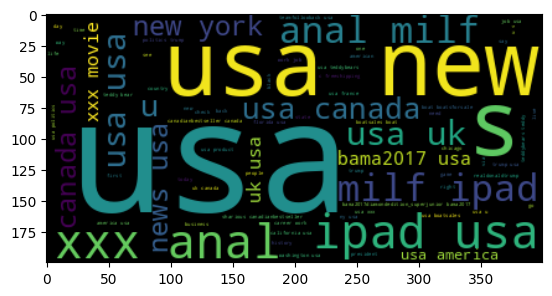

In [32]:
neutral_tweets = usa_tweets_df[usa_tweets_df['Sentiment'] == 'neutral']
wordcloud = WordCloud().generate(' '.join(neutral_tweets['Content']))
plt.imshow(wordcloud, interpolation='bilinear');

#### USA i charakterystyczne słowa dla neutralnych tweetów:
- 

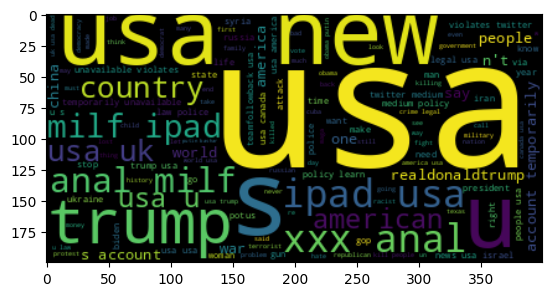

In [33]:
negative_tweets = usa_tweets_df[usa_tweets_df['Sentiment'] == 'negative']
wordcloud = WordCloud().generate(' '.join(negative_tweets['Content']))
plt.imshow(wordcloud, interpolation='bilinear');

In [ ]:
china_tweets_df.value_counts('Sentiment').plot.pie(autopct='%1.1f%%', figsize=(5, 5));
usa_tweets_df.value_counts('Sentiment').plot.pie(autopct='%1.1f%%', figsize=(5, 5));

#### USA i charakterystyczne słowa dla negatywnych tweetów:
- 

## BERT

In [ ]:
from transformers import pipeline

# create a sentiment analysis pipeline
nlp = pipeline("sentiment-analysis", device=0) # < 0 means CPU, >= 0 means GPU

# classify some text
def bert_sentiment(text):
    result = nlp(text)[0]

    # print the result
    sentiment = result['label']
    return sentiment

In [ ]:
china_tweets_df['Bert_Sentiment'] = china_tweets_df['Content'].apply(bert_sentiment)

In [ ]:
usa_tweets_df['Bert_Sentiment'] = usa_tweets_df['Content'].apply(bert_sentiment)

In [11]:
china_tweets_df.to_csv('china_tweets_sentiment.csv', index=False)

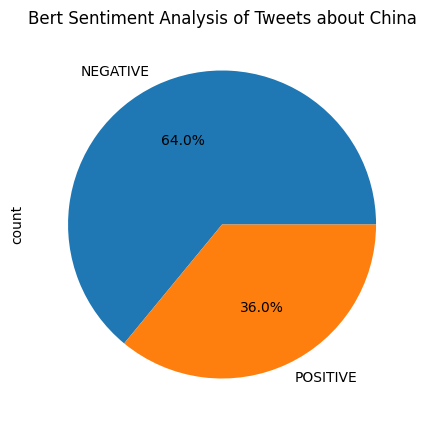

In [27]:
china_tweets_df.value_counts('Bert_Sentiment').plot.pie(figsize=(5, 5), autopct='%1.1f%%', title='Bert Sentiment Analysis of Tweets about China');
usa_tweets_df.value_counts('Bert_Sentiment').plot.pie(figsize=(5, 5), autopct='%1.1f%%', title='Bert Sentiment Analysis of Tweets about USA');